In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# BCE classifier

> API details.

In [2]:
#hide
from nbdev.showdoc import *

In [3]:
from pytorch_inferno.model_wrapper import ModelWrapper
from pytorch_inferno.callback import *
from pytorch_inferno.data import get_paper_data
from pytorch_inferno.plotting import *
from pytorch_inferno.inference import *
from pytorch_inferno.utils import *

from fastcore.all import partialler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from typing import *
from collections import OrderedDict

import torch.nn as nn
from torch import optim
import torch
from torch import Tensor
from torch import autograd

In [4]:
net = nn.Sequential(nn.Linear(3,100),  nn.ReLU(),
                    nn.Linear(100,100),nn.ReLU(),
                    nn.Linear(100,1),  nn.Sigmoid())
init_net(net)

In [6]:
model = ModelWrapper(net)

data, test = get_paper_data(200000, bs=32, n_test=1000000)

In [7]:
model.fit(200, data=data, opt=partialler(optim.SGD,lr=1e-3), loss=nn.BCELoss(),
          cbs=[LossTracker(),SaveBest('weights/best_bce.h5'),EarlyStopping(10)])

1: Train=0.4222367459440231 Valid=0.3818375404167175
2: Train=0.36534119380235675 Valid=0.3526139043903351
3: Train=0.3473478007388115 Valid=0.34299325704574585
4: Train=0.3413536496305466 Valid=0.3396366716194153
5: Train=0.33937821600914003 Valid=0.3384710033082962
6: Train=0.3386472702217102 Valid=0.3385546123313904
7: Train=0.33820967024326326 Valid=0.337892559633255
8: Train=0.3379470380961895 Valid=0.3375563053226471
9: Train=0.33775099663853647 Valid=0.3377980812454224
10: Train=0.3374708180272579 Valid=0.33695298463344575
11: Train=0.3372348613536358 Valid=0.3370100667047501
12: Train=0.33706380971908567 Valid=0.3366574294996262
13: Train=0.33682140608787536 Valid=0.33659679384231567
14: Train=0.3367246814119816 Valid=0.33639496898174287
15: Train=0.33647885818719864 Valid=0.33636334522247313
16: Train=0.33628102334737775 Valid=0.336374228682518
17: Train=0.33615888860821724 Valid=0.33597907242298125
18: Train=0.33603640856862066 Valid=0.33593755472660064
19: Train=0.3358787017

In [8]:
model.save('weights/BCE_Test.h5')

In [ ]:
model.load('weights/BCE_Test.h5')

## BM 0

In [9]:
preds = model._predict_dl(test)

In [10]:
preds

array([[0.90637016],
       [0.8350277 ],
       [0.92156124],
       ...,
       [0.04017838],
       [0.02817404],
       [0.10770151]], dtype=float32)

In [11]:
df = pd.DataFrame({'pred':preds.squeeze()})
df['gen_target'] = test.dataset.y
df.head()

,pred,gen_target
0,0.906370,1.0
1,0.835028,1.0
2,0.921561,1.0
3,0.890578,1.0
4,0.910866,1.0


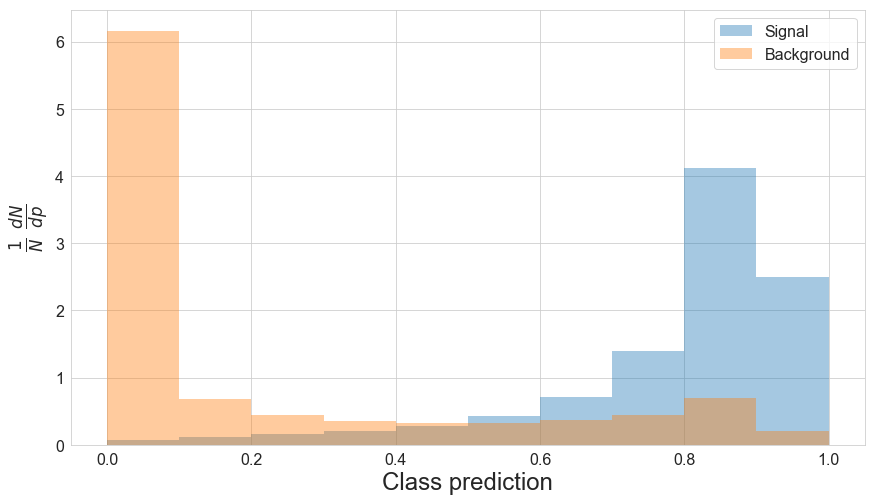

In [12]:
plot_preds(df)

In [13]:
bin_preds(df, np.linspace(0,1,11))

In [14]:
df.head()

,pred,gen_target,pred_bin
0,0.906370,1.0,9
1,0.835028,1.0,8
2,0.921561,1.0,9
3,0.890578,1.0,8
4,0.910866,1.0,9


In [15]:
f_s,f_b = get_shape(df,1),get_shape(df,0)

In [16]:
f_s.sum(), f_b.sum()

(tensor(1.), tensor(1.))

In [17]:
f_s, f_b

(tensor([1.9190e-02, 1.5702e-02, 2.1098e-02, 2.8310e-02, 4.2944e-02, 7.1572e-02,
         1.3923e-01, 4.1234e-01, 2.4961e-01, 2.0000e-13]),
 tensor([6.8475e-01, 4.4522e-02, 3.4762e-02, 3.2348e-02, 3.2874e-02, 3.7072e-02,
         4.4540e-02, 6.9334e-02, 1.9794e-02, 2.0000e-13]))

In [18]:
asimov = (50*f_s)+(1000*f_b)

In [19]:
asimov, asimov.sum()

(tensor([6.8571e+02, 4.5307e+01, 3.5817e+01, 3.3764e+01, 3.5021e+01, 4.0651e+01,
         5.1501e+01, 8.9951e+01, 3.2275e+01, 2.1000e-10]), tensor(1049.9999))

In [20]:
n = 1050
x = np.linspace(20,80,61)
y = np.zeros_like(x)
for i,m in enumerate(x):
    pois = torch.distributions.Poisson((m*f_s)+(1000*f_b))
    y[i] = -pois.log_prob(asimov).sum()
y

array([28.84640503, 28.68955231, 28.53907776, 28.39414978, 28.25622559,
       28.12445831, 27.99790955, 27.87815094, 27.76402283, 27.65538788,
       27.55278778, 27.45555115, 27.36487579, 27.27848816, 27.19828033,
       27.12339783, 27.05305481, 26.98868561, 26.929039  , 26.87463379,
       26.82529449, 26.78072357, 26.74150085, 26.70687866, 26.67731476,
       26.65196991, 26.63161469, 26.61606598, 26.60460663, 26.59792328,
       26.59568787, 26.59764099, 26.60446167, 26.61532593, 26.63027954,
       26.65036774, 26.67345428, 26.7014389 , 26.73292542, 26.76877594,
       26.80890656, 26.85219574, 26.90015411, 26.9517746 , 27.0069809 ,
       27.0669632 , 27.12949371, 27.19646454, 27.26712799, 27.34070587,
       27.4187088 , 27.49994659, 27.58451843, 27.67285919, 27.76493835,
       27.85996246, 27.95909119, 28.06087494, 28.16655731, 28.27528381,
       28.38702393])

In [21]:
y_tf2 = np.array([31.626238,31.466385,31.313095,31.166267,31.025808,30.891619,30.76361
,30.641693,30.525778,30.415783,30.31162,30.213215,30.120483,30.033348
,29.951736,29.875574,29.804789,29.739307,29.679066,29.623993,29.574026
,29.5291,29.489151,29.454117,29.423939,29.398558,29.377914,29.361954
,29.35062,29.343859,29.341618,29.343842,29.350483,29.36149,29.376812
,29.396404,29.420216,29.448202,29.480318,29.516518,29.556757,29.600994
,29.649185,29.70129,29.757267,29.817076,29.88068,29.948036,30.019108
,30.093859,30.17225,30.25425,30.339819,30.42892,30.521524,30.617598
,30.7171,30.820007,30.926281,31.035892,31.148808], dtype='float32')

In [22]:
y_tf2-y_tf2.min()

array([2.2846203e+00, 2.1247673e+00, 1.9714775e+00, 1.8246498e+00,
       1.6841908e+00, 1.5500011e+00, 1.4219933e+00, 1.3000755e+00,
       1.1841602e+00, 1.0741653e+00, 9.7000313e-01, 8.7159729e-01,
       7.7886581e-01, 6.9173050e-01, 6.1011887e-01, 5.3395653e-01,
       4.6317101e-01, 3.9768982e-01, 3.3744812e-01, 2.8237534e-01,
       2.3240852e-01, 1.8748283e-01, 1.4753342e-01, 1.1249924e-01,
       8.2321167e-02, 5.6940079e-02, 3.6296844e-02, 2.0336151e-02,
       9.0026855e-03, 2.2411346e-03, 0.0000000e+00, 2.2239685e-03,
       8.8653564e-03, 1.9872665e-02, 3.5194397e-02, 5.4786682e-02,
       7.8598022e-02, 1.0658455e-01, 1.3870049e-01, 1.7490005e-01,
       2.1513939e-01, 2.5937653e-01, 3.0756760e-01, 3.5967255e-01,
       4.1564941e-01, 4.7545815e-01, 5.3906250e-01, 6.0641861e-01,
       6.7749023e-01, 7.5224113e-01, 8.3063316e-01, 9.1263199e-01,
       9.9820137e-01, 1.0873032e+00, 1.1799068e+00, 1.2759800e+00,
       1.3754826e+00, 1.4783897e+00, 1.5846634e+00, 1.6942749e

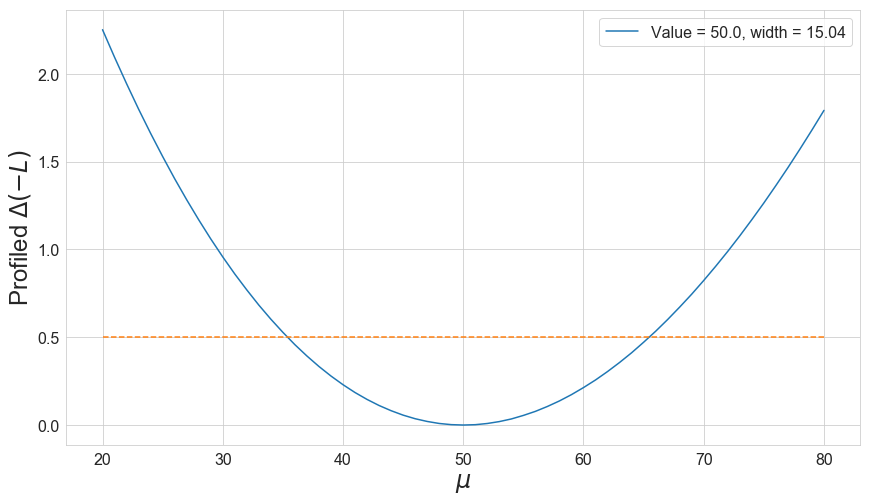

In [23]:
plot_likelihood(y-y.min())

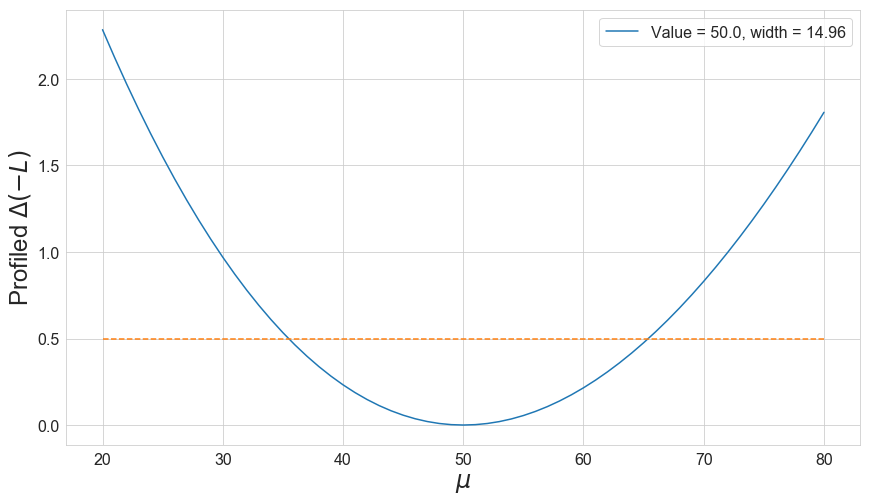

In [24]:
plot_likelihood(y_tf2-y_tf2.min())

# Nuisances - via interpolation

In [25]:
bkg = test.dataset.x[test.dataset.y.squeeze() == 0]
assert len(bkg) == 500000

In [26]:
b_shapes = get_paper_syst_shapes(bkg, df, model=model, bins=np.linspace(0,1,11))

Running: r=-0.2


Running: r=0


Running: r=0.2


Running: l=2.5


Running: l=3


Running: l=3.5


In [27]:
df

,pred,gen_target,pred_bin,pred_-0.2_3,pred_-0.2_3_bin,pred_0_3,pred_0_3_bin,pred_0.2_3,pred_0.2_3_bin,pred_0_2.5,pred_0_2.5_bin,pred_0_3.5,pred_0_3.5_bin
0,0.906370,1.0,9,0.906370,9,0.906370,9,0.906370,9,0.906370,9,0.906370,9
1,0.835028,1.0,8,0.835028,8,0.835028,8,0.835028,8,0.835028,8,0.835028,8
2,0.921561,1.0,9,0.921561,9,0.921561,9,0.921561,9,0.921561,9,0.921561,9
3,0.890578,1.0,8,0.890578,8,0.890578,8,0.890578,8,0.890578,8,0.890578,8
4,0.910866,1.0,9,0.910866,9,0.910866,9,0.910866,9,0.910866,9,0.910866,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.102149,0.0,1,0.106313,1,0.102149,1,0.093672,0,0.101430,1,0.102792,1
999996,0.090290,0.0,0,0.135591,1,0.090290,0,0.058149,0,0.083179,0,0.094615,0
999997,0.040178,0.0,0,0.034927,0,0.040178,0,0.047121,0,0.040089,0,0.040268,0
999998,0.028174,0.0,0,0.042808,0,0.028174,0,0.018328,0,0.025211,0,0.031717,0


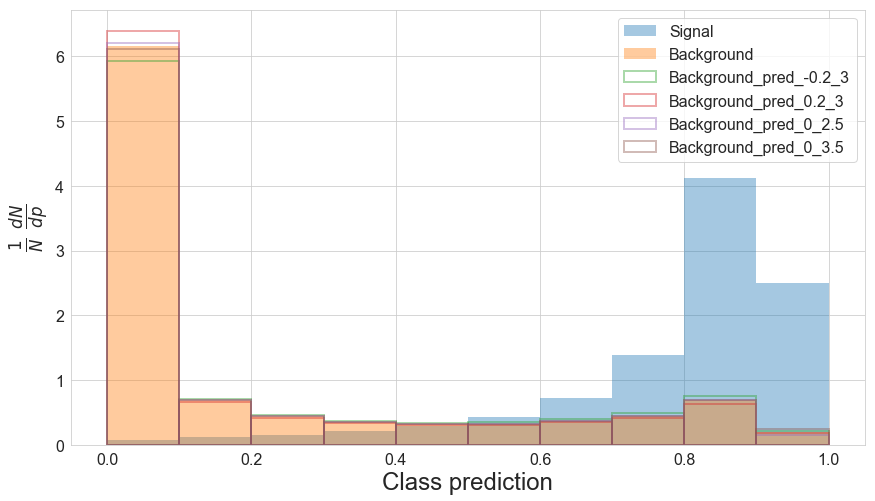

In [28]:
plot_preds(df, pred_names=['pred', 'pred_-0.2_3', 'pred_0.2_3', 'pred_0_2.5', 'pred_0_3.5'])

In [29]:
b_shapes['f_b_nom']

tensor([6.8475e-01, 4.4522e-02, 3.4762e-02, 3.2348e-02, 3.2874e-02, 3.7072e-02,
        4.4540e-02, 6.9334e-02, 1.9794e-02, 2.0000e-13])

In [30]:
b_shapes['f_b_up']

tensor([[7.0599e-01, 4.1730e-02, 3.3740e-02, 3.0436e-02, 3.0690e-02, 3.4592e-02,
         4.1342e-02, 6.3348e-02, 1.8136e-02, 2.0000e-13],
        [6.7950e-01, 4.4862e-02, 3.4880e-02, 3.2510e-02, 3.2826e-02, 3.6730e-02,
         4.5110e-02, 6.9540e-02, 2.4040e-02, 2.0000e-13]])

In [31]:
b_shapes['f_b_dw']

tensor([[6.6389e-01, 4.6468e-02, 3.6822e-02, 3.4040e-02, 3.4586e-02, 3.9142e-02,
         4.8400e-02, 7.5154e-02, 2.1496e-02, 2.0000e-13],
        [6.8993e-01, 4.4040e-02, 3.4784e-02, 3.2224e-02, 3.2834e-02, 3.7414e-02,
         4.4110e-02, 6.9158e-02, 1.5502e-02, 2.0000e-13]])

In [32]:
f_s

tensor([1.9190e-02, 1.5702e-02, 2.1098e-02, 2.8310e-02, 4.2944e-02, 7.1572e-02,
        1.3923e-01, 4.1234e-01, 2.4961e-01, 2.0000e-13])

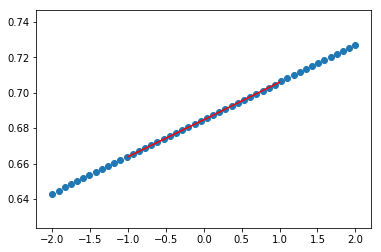

In [33]:
i = 0
d = b_shapes['f_b_dw'][0][i]
n = b_shapes['f_b_nom'][i]
u = b_shapes['f_b_up'][0][i]
interp = []
rs = np.linspace(-2,2)
for r in rs: interp.append(interp_shape(Tensor((r,0))[None,:], **b_shapes)[0][i].data.item())
plt.scatter(rs, interp)
plt.plot([-1,0,1],[d,n,u], label=i, color='r')

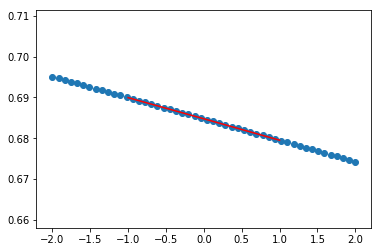

In [34]:
i = 0
d = b_shapes['f_b_dw'][1][i]
n = b_shapes['f_b_nom'][i]
u = b_shapes['f_b_up'][1][i]
interp = []
ls = np.linspace(-2,2)
for l in ls: interp.append(interp_shape(Tensor((0,l))[None,:], **b_shapes)[0][i].data.item())
plt.scatter(ls, interp)
plt.plot([-1,0,1],[d,n,u], label=i, color='r')

In [35]:
b_shapes['f_b_nom']

tensor([6.8475e-01, 4.4522e-02, 3.4762e-02, 3.2348e-02, 3.2874e-02, 3.7072e-02,
        4.4540e-02, 6.9334e-02, 1.9794e-02, 2.0000e-13])

In [36]:
alpha = Tensor((1,0))[None,:]
interp_shape(alpha, **b_shapes).squeeze()

tensor([7.0599e-01, 4.1730e-02, 3.3740e-02, 3.0436e-02, 3.0690e-02, 3.4592e-02,
        4.1342e-02, 6.3348e-02, 1.8136e-02, 2.0000e-13])

In [37]:
b_shapes['f_b_up']

tensor([[7.0599e-01, 4.1730e-02, 3.3740e-02, 3.0436e-02, 3.0690e-02, 3.4592e-02,
         4.1342e-02, 6.3348e-02, 1.8136e-02, 2.0000e-13],
        [6.7950e-01, 4.4862e-02, 3.4880e-02, 3.2510e-02, 3.2826e-02, 3.6730e-02,
         4.5110e-02, 6.9540e-02, 2.4040e-02, 2.0000e-13]])

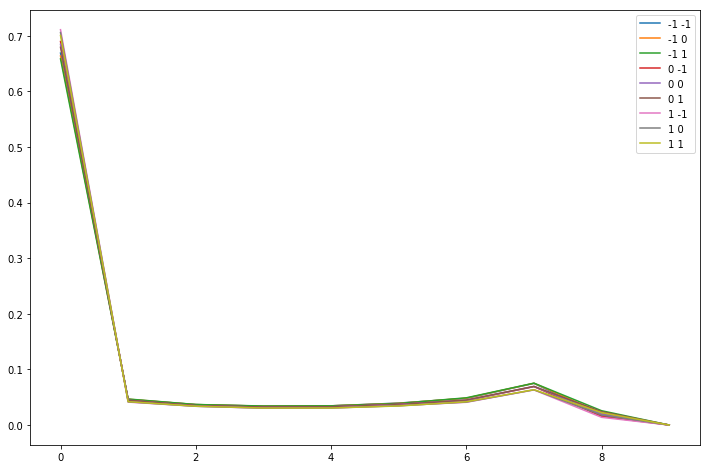

In [38]:
fig = plt.figure(figsize=(12,8))
for r in [-1,0,1]:
    for l in [-1,0,1]:
        alpha = Tensor((r,l))[None,:]
        s = interp_shape(alpha, **b_shapes).squeeze()
        plt.plot(s, label=f'{r} {l}')
plt.legend()

# Newton

In [39]:
profiler = partialler(calc_profile, n=1050, mu_scan=torch.linspace(20,80,61), true_mu=50)

## BM 1
r free, l fixed

In [40]:
bm1_b_shapes = OrderedDict([('f_b_nom', b_shapes['f_b_nom']),
                            ('f_b_up',  b_shapes['f_b_up'][0][None,:]),
                            ('f_b_dw',  b_shapes['f_b_dw'][0][None,:])])

In [41]:
bm1_b_shapes['f_b_up'].shape

torch.Size([1, 10])

In [42]:
nll = profiler(f_s=f_s, n_steps=100, **bm1_b_shapes)

In [43]:
nll = to_np(nll)

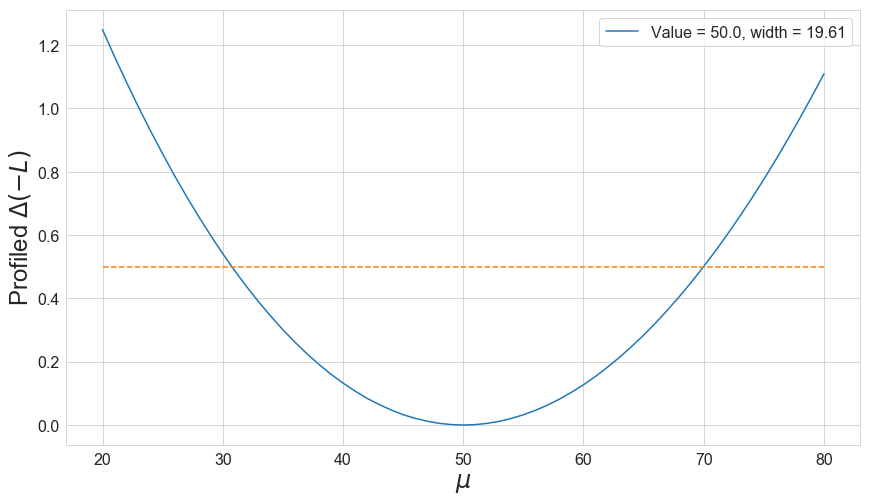

In [44]:
plot_likelihood(nll-nll.min())

## BM 1l
r fixed, l free

In [45]:
bm1l_b_shapes = OrderedDict([('f_b_nom', b_shapes['f_b_nom']),
                             ('f_b_up',  b_shapes['f_b_up'][1][None,:]),
                             ('f_b_dw',  b_shapes['f_b_dw'][1][None,:])])

In [46]:
nll = profiler(f_s=f_s, n_steps=100, **bm1l_b_shapes)

Linear regime: Mu 20.0, alpha tensor([1.7136])
Linear regime: Mu 21.0, alpha tensor([1.6563])
Linear regime: Mu 22.0, alpha tensor([1.5989])
Linear regime: Mu 23.0, alpha tensor([1.5416])
Linear regime: Mu 24.0, alpha tensor([1.4843])
Linear regime: Mu 25.0, alpha tensor([1.4270])
Linear regime: Mu 26.0, alpha tensor([1.3697])
Linear regime: Mu 27.0, alpha tensor([1.3125])
Linear regime: Mu 28.0, alpha tensor([1.2552])
Linear regime: Mu 29.0, alpha tensor([1.1980])
Linear regime: Mu 30.0, alpha tensor([1.1408])
Linear regime: Mu 31.0, alpha tensor([1.0836])
Linear regime: Mu 32.0, alpha tensor([1.0265])
Linear regime: Mu 69.0, alpha tensor([-1.0582])
Linear regime: Mu 70.0, alpha tensor([-1.1138])
Linear regime: Mu 71.0, alpha tensor([-1.1694])
Linear regime: Mu 72.0, alpha tensor([-1.2250])
Linear regime: Mu 73.0, alpha tensor([-1.2805])
Linear regime: Mu 74.0, alpha tensor([-1.3361])
Linear regime: Mu 75.0, alpha tensor([-1.3916])
Linear regime: Mu 76.0, alpha tensor([-1.4472])
Linea

In [47]:
nll = to_np(nll)

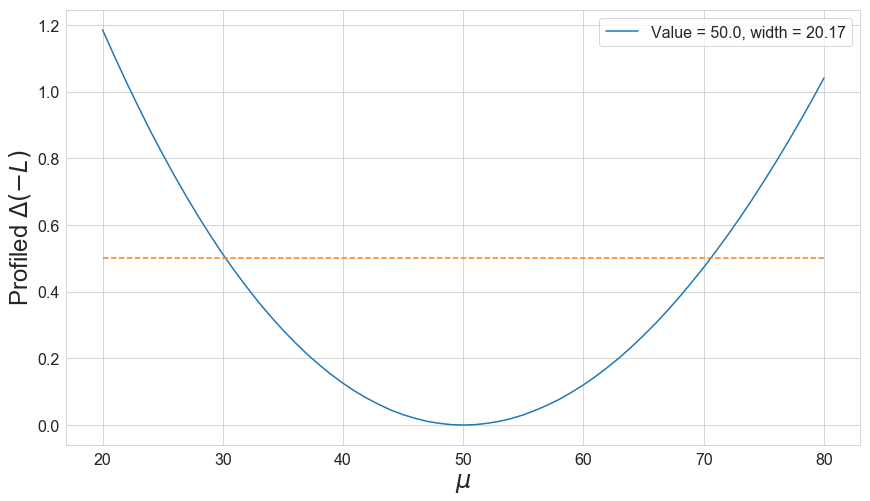

In [48]:
plot_likelihood(nll-nll.min())

## BM 2

In [49]:
nll = profiler(f_s=f_s, n_steps=100, **b_shapes)

Linear regime: Mu 20.0, alpha tensor([-0.6725,  1.2197])
Linear regime: Mu 21.0, alpha tensor([-0.6492,  1.1797])
Linear regime: Mu 22.0, alpha tensor([-0.6260,  1.1396])
Linear regime: Mu 23.0, alpha tensor([-0.6028,  1.0995])
Linear regime: Mu 24.0, alpha tensor([-0.5797,  1.0593])
Linear regime: Mu 25.0, alpha tensor([-0.5566,  1.0191])
Linear regime: Mu 75.0, alpha tensor([ 0.5115, -1.0318])
Linear regime: Mu 76.0, alpha tensor([ 0.5306, -1.0739])
Linear regime: Mu 77.0, alpha tensor([ 0.5495, -1.1160])
Linear regime: Mu 78.0, alpha tensor([ 0.5684, -1.1582])
Linear regime: Mu 79.0, alpha tensor([ 0.5871, -1.2005])
Linear regime: Mu 80.0, alpha tensor([ 0.6058, -1.2429])


In [50]:
nll = to_np(nll)

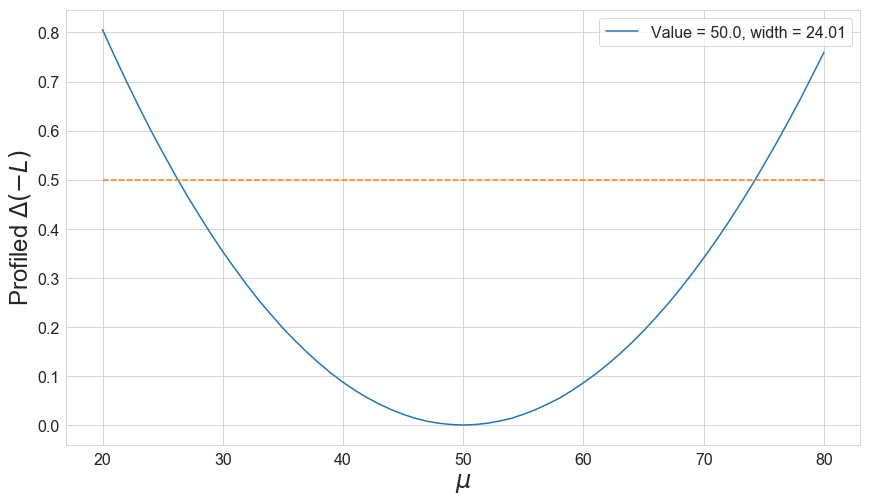

In [51]:
plot_likelihood(nll-nll.min())